In [8]:
## 길이 50cm 무게 1500g짜리 농어를 1000g으로 예측한다 ( 오차 500g )
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# 데이터 나누기
import random
from matplotlib.pylab import rand


train_input,test_input,train_target,test_target=train_test_split(
    perch_length,perch_weight,random_state=42
)

# 훈련셋과 테스트셋의 독립특성을 2차원 배열로 변환
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

In [11]:
# 모델 임퐆트 및 훈련
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [12]:
# 길이 가 50cm짜리 농어의 무게 예측 -> 실제값 1500
knr.predict([[50]])

array([1033.33333333])

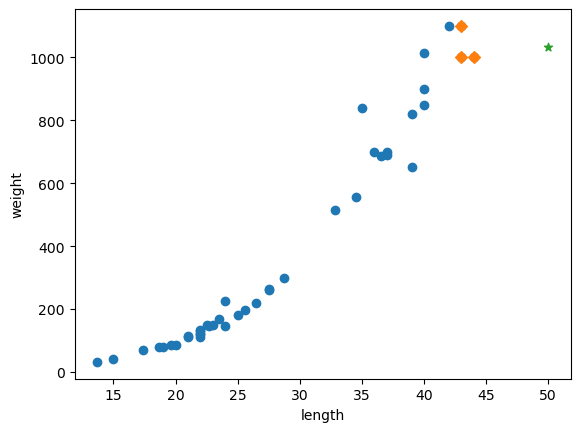

In [13]:
import matplotlib.pyplot as plt
from pytest import mark

distance, index=knr.kneighbors([[50]])

# 훈련셋 산점도
plt.scatter(train_input,train_target)

# 훈련셋에서 50cm짜리 샘플과 이웃하는 데이터 그리기
plt.scatter(train_input[index],train_target[index],marker="D")
plt.scatter(50,1033,marker="*")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
# 선형회귀 라이브러리 임포트
from sklearn.linear_model import LinearRegression


In [15]:
lr=LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [16]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [17]:
# 모델이 학습한 선형 방정식 출력
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


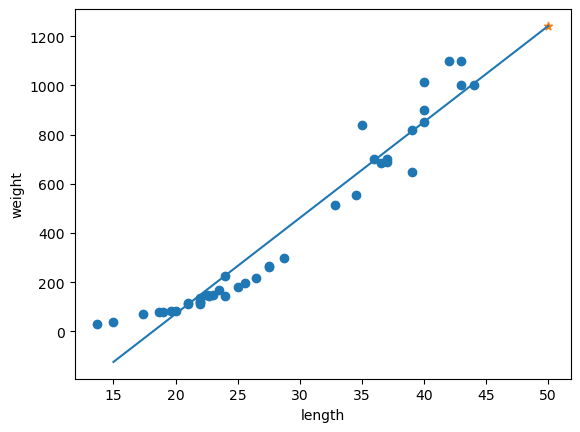

In [18]:
# 훈련셋 산점도
plt.scatter(train_input,train_target)

plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

plt.scatter(50,1241.83860323,marker="*")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
# 피팅스코어, 테스트스코어 출력
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

# -> 언더피팅에 해당됨

0.939846333997604
0.8247503123313558


In [21]:
# 다항회귀
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))
print(train_poly[:5])

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]


In [22]:
# 모델 생성 및 학습
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [23]:
# 모델이 학습한 기울기와 절편 출력
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278304


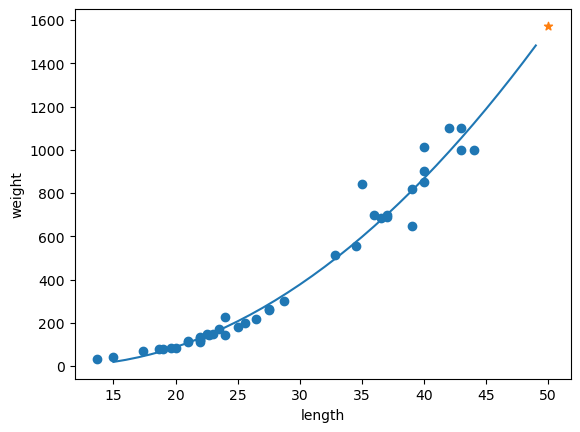

In [24]:
# 구간별 곡선을 그리기 위한 시각화
point=np.arange(15,50)
plt.scatter(train_input,train_target)
plt.plot(point,1.01*point**2-21.6*point+116.05)
plt.scatter([50],[1573],marker="*")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
# 피팅점수(정확도) 출력
print('학습 점수: ',lr.score(train_poly,train_target))
print('학습 점수: ',lr.score(test_poly,test_target))

# -> 과소적합 해소 X

학습 점수:  0.9706807451768623
학습 점수:  0.9775935108325122
